# 2.2 Pythonによる機械学習

ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

学習データ (iris) の読み込みと概要の表示

In [2]:
iris = load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

前処理（主成分分析で2次元に変換）

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

結果を散布図として表示

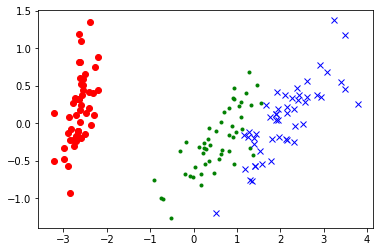

In [4]:

plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"g.")
plt.plot(X2[y==2,0], X2[y==2,1],"bx")

前処理 (標準化)

In [5]:
X_scaled = preprocessing.scale(X)

学習（k-NN法で識別を行う識別器の作成）

In [6]:
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


学習（交差確認法による性能評価）

In [7]:
scores = cross_val_score(clf, X_scaled, y, cv=10)

正解率の平均と95%信頼区間の表示

In [8]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.13)


学習（混同行列の表示）

In [9]:
y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


# まとめ

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
iris = load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"g.")
plt.plot(X2[y==2,0], X2[y==2,1],"bx")
X_scaled = preprocessing.scale(X)
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)
scores = cross_val_score(clf, X_scaled, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
print(confusion_matrix(y, y_pred))

### 演習問題2.2 

In [10]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y, y_pred, average='micro'))

(0.9533333333333334, 0.9533333333333334, 0.9533333333333334, None)
